In [45]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

Boost Converter
=========
#### Conversor abaixador

O conversor de buck tem uma estrutura simples e de operação direta, uma ótima opção de conversor CC-CC PWM. A tensão de saída de um conversor buck é sempre menor que a tensão de entrada, por isso ele é conhecido também como conversor abaixador.

O conversor buck é composto por uma fonte de tensão contínua, um transistor que funciona como uma chave, um diodo, um indutor, um capacitor e a carga. A chave irá controlar em qual estado estará o circuito, on-time ou off-time. Durante o período on-time, a chave é fechada e o diodo está no estado desligado. Neste intervalo a fonte de tensão transfere energia para o indutor e a corrente sobre ele aumenta. Já no período off-time, a chave estará aberta e o diodo ligado. Assim, a energia armazenada no indutor é liberada para a carga e a corrente no indutor diminui. 

O estado estacionário no conversor é atingido quando a transferência de energia dentro do tempo torna-se a mesma que a liberação de energia fora do tempo. Nesse estado a corrente no indutor estabele uma forma de onda triangular periódica e a tensão de saída torna-se quase constante com um pequeno componente de ondulação. 

#### Esquemático de um conversor Boost

![Boost.png](Boost.png)

#### Etapas do projeto:

  1. Definir parâmetros de projeto (Vin, Vout, Po, fs, variação de IL e de Vc)
  2. Calcular a razão cíclica (D=1-(Vin/Vout)
  3. Calcular indutância (L=(Vin.D.Ts)/(variação de IL)
  4. Calcular a capacitância (C=(Io.D.Ts)/variação de Vc)
  5. Calcular os esforços nos semicondutores (Ismd, Isef, Ismax, Idmds, Idef, Idmax, Vsmax e Vdmax)

#### Tensão de Entrada:

In [46]:
Vin = 75
print("A tensão de entrada é", Vin, "V")

A tensão de entrada é 75 V


#### Tensão de Saída: 

In [47]:
Vout = 120
print("A tensão de saída é", Vout, "V")

A tensão de saída é 120 V


#### Potência máxima de saída:

In [48]:
Po = 40
print("A potência máxima de saída é", Po, "W")

A potência máxima de saída é 40 W


#### Frequência de comutação: 

In [49]:
fs = 40000
print("A frequência de comutação é", fs, "Hz")

A frequência de comutação é 40000 Hz


#### Razão ciclíca:

$$D = {1-{Vin \over Vout}}$$

In [50]:
D = 1-(Vin/Vout)
print("A razão ciclíca é", D)

A razão ciclíca é 0.375


#### Corrente de saída:

$$Io = {Po \over Vout}$$

In [51]:
Io = Po/Vout
print("A corrente de saída é", Io, "A")

A corrente de saída é 0.3333333333333333 A


#### Ondulação de corrente no indutor:

###### Ondulação de 10%:
$$\Delta_{Il} = 0.1\cdot Io$$

In [52]:
delta_Il = 0.1*Io
print("A ondulação de corrente no indutor é", delta_Il, "A")

A ondulação de corrente no indutor é 0.03333333333333333 A


#### Ondulação de tensão no capacitor:

###### Ondulação de 1%:
$$\Delta_{Vc} = 0.01 \cdot Vout$$

In [53]:
delta_Vc = 0.01*Vout
print("A ondulação de tensão no capacitor é", delta_Vc, "V")

A ondulação de tensão no capacitor é 1.2 V


#### Resistência de carga:

$$Ro = {Vout^2 \over Po}$$

In [54]:
Ro = (Vout**2)/Po
print("A resistência de carga é", Ro, "ohms")

A resistência de carga é 360.0 ohms


#### Indutor de Saída:

$$Lo = {Vin \cdot D \over fs\cdot\Delta_{Il}}$$

In [55]:
Lo = Vin*D/(fs*delta_Il)
print("O indutor de saída é", Lo, "H")

O indutor de saída é 0.02109375 H


#### Capacitor de Saída:

$$Co = {Io \cdot D \over fs \cdot \Delta_{Vc}}$$

In [56]:
Co = (Io*D)/(fs*delta_Vc)
print("O capacitor de saída é", Co, "F")

O capacitor de saída é 2.6041666666666666e-06 F


### Esforços na chave:

#### Valor médio da corrente na chave:

$$Is_{md} = DIo$$

In [57]:
Is_md = D*Io 
print("O valor médio da corrente na chave é", Is_md, "A")

O valor médio da corrente na chave é 0.125 A


#### Valor eficaz da corrente na chave:

$$Is_{ef} = \sqrt{D}Io$$

In [58]:
Is_ef = (D**0.5)*Io 
print("O valor eficaz da corrente na chave é", Is_ef, "A")

O valor eficaz da corrente na chave é 0.20412414523193148 A


#### Valor máximo da corrente na chave:

$$Is_{max} = Io + {\Delta_{Il} \over 2}$$

In [59]:
Is_max = Io + delta_Il/2 
print("O valor máximo da corrente na chave é", Is_max, "A")

O valor máximo da corrente na chave é 0.35 A


#### Valor máximo da tensão na chave:

$$Vs_{max} = Vout$$

In [60]:
Vs_max = Vout
print("O valor máximo da tensão na chave é", Vs_max, "V")

O valor máximo da tensão na chave é 120 V


### Esforços no diodo:

#### Valor médio da corrente no diodo:

$$Id_{md} = (1-D)Io$$

In [61]:
Id_md = (1-D)*Io 
print("O valor médio da corrente no diodo é", Id_md, "A")

O valor médio da corrente no diodo é 0.20833333333333331 A


#### Valor eficaz da corrente no diodo:

$$Id_{ef} = \sqrt{(1-D)}Io$$

In [62]:
Id_ef = ((1-D)**0.5)*Io 
print("O valor eficaz da corrente no diodo é", Id_ef, "A")

O valor eficaz da corrente no diodo é 0.26352313834736496 A


#### Valor máximo da corrente no diodo:

$$Id_{max} = Io + {\Delta_{Il} \over s}$$

In [63]:
Id_max = Io + delta_Il/2 
print("O valor máximo da corrente no diodo é", Id_max, "A")

O valor máximo da corrente no diodo é 0.35 A


#### Valor máximo da tensão no diodo:

$$Vd_{max} = Vin$$

In [64]:
Vd_max = Vin
print("O valor máximo da tensão no diodo é", Vd_max, "V")

O valor máximo da tensão no diodo é 75 V


#### Resistência crítica:

$$Rcrit = {2Lofs \over (1-D)}$$

In [65]:
Rcrit = 2*Lo*fs/(1-D)
print("A resistência crítica é", Rcrit, "ohms")

A resistência crítica é 2700.0 ohms


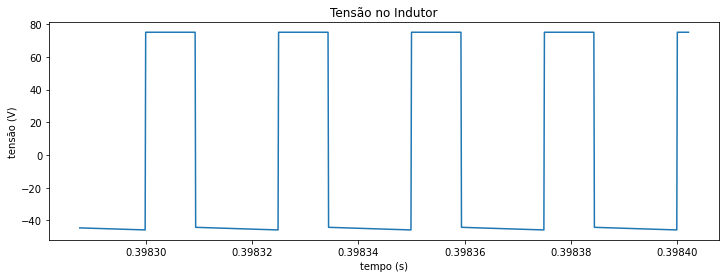

In [66]:
import numpy  as np
import matplotlib.pyplot as plt

data = np.loadtxt("dados/boost/120v - 40W/tensao_no_indutor.csv", delimiter=',', skiprows=1)


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(x, y,'-')

plt.title('Tensão no Indutor')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.show()

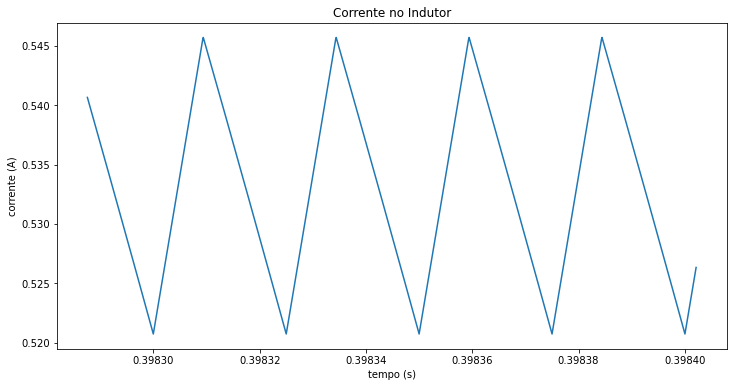

In [67]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/boost/120v - 40W/corrente_no_indutor.csv', delimiter=',', skiprows=1)


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,6))#altera as dimensões do gráfico
plt.plot(x, y,'-')

plt.title('Corrente no Indutor')
plt.xlabel('tempo (s)')
plt.ylabel('corrente (A)')
plt.show()

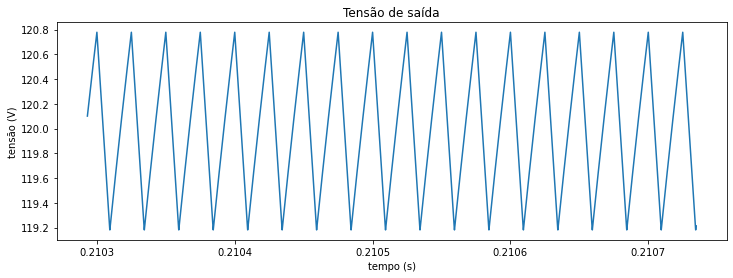

In [68]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/boost/120v - 40W/Vout.txt', skiprows=1)


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(x, y,'-')

plt.title('Tensão de saída')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.show()

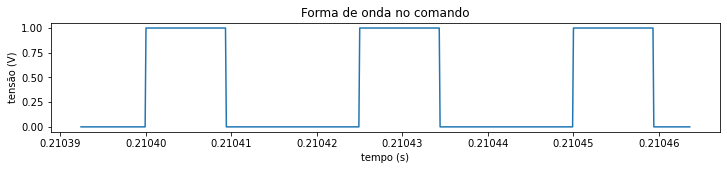

In [69]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/boost/120v - 40W/PWM.csv', delimiter=',', skiprows=1)


x = data[:, 0]
y = data[:, 1]
plt.figure(figsize=(12,2))#altera as dimensões do gráfico
plt.plot(x, y,'-')

plt.title('Forma de onda no comando')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.show()

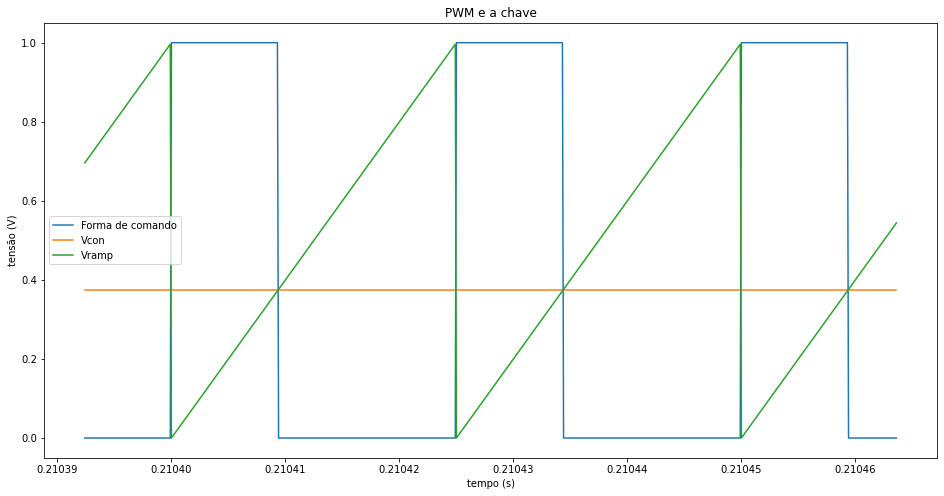

In [70]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/boost/120v - 40W/PWM.csv', delimiter=',', skiprows=1)


x = data[:, 0]#tempo
y = data[:, 1]#onda de comand, chave on
z = data[:, 2]#Vcon
g = data[:, 3]#Vramp
plt.figure(figsize=(16,8))#altera as dimensões do gráfico
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,g)

plt.title('PWM e a chave')
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.legend(['Forma de comando','Vcon','Vramp'], loc = 'best', fontsize=10)
plt.show()

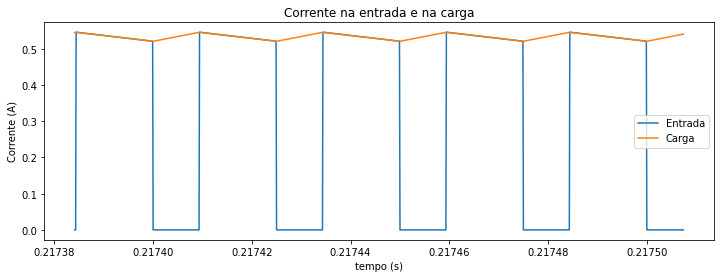

In [71]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/boost/120v - 40W/corrente_entradaXcarga.csv', delimiter=',', skiprows=1)


x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
plt.figure(figsize=(12,4))#altera as dimensões do gráfico
plt.plot(x,y)
plt.plot(x,z)

plt.title('Corrente na entrada e na carga')
plt.xlabel('tempo (s)')
plt.ylabel('Corrente (A)')
plt.legend(['Entrada','Carga'], loc = 'best')
plt.show()

#### Segunda opção de projeto:
- Alteração da tensão de saída para 120V.
- Alteração da potência para 30W. 

In [72]:
Vin2 = 75
Vout2 = 120
Po2 = 30
fs2 = 20000


print("A tensão de entrada é", Vin, "V")

print("A tensão de saída é", Vout2, "V")

print("A potência máxima de saída é", Po2, "W")

print("A frequência de comutação é", fs, "Hz")
D2 = 1-(Vin2/Vout2)
print("A razão ciclíca é", D2)
Io2 = Po2/Vout2
print("A corrente de saída é", Io2, "A")
delta_Il2 = 0.1*Io2
print("A ondulação de corrente no indutor é", delta_Il2, "A")
delta_Vc2 = 0.01*Vout2
print("A ondulação de tensão no capacitor é", delta_Vc2, "V")
Ro2 = (Vout2**2)/Po2
print("A resistência de carga é", Ro2, "ohms")
Lo2 = Vin2*D2/(fs2*delta_Il2)
print("O indutor de saída é", Lo2, "H")
Co2 = (Io2*D2)/(fs2*delta_Vc2)
print("O capacitor de saída é", Co2, "F")
Is_md2 = D2*Io2
print("O valor médio da corrente na chave é", Is_md2, "A")
Is_ef2 = (D2**0.5)*Io2 
print("O valor eficaz da corrente na chave é", Is_ef2, "A")
Is_max2 = Io2 + delta_Il2/2 
print("O valor máximo da corrente na chave é", Is_max2, "A")
Vs_max2 = Vin
print("O valor máximo da tensão na chave é", Vs_max2, "V")
Id_md2 = (1-D2)*Io2 
print("O valor médio da corrente no diodo é", Id_md2, "A")
Id_ef2 = ((1-D2)**0.5)*Io2 
print("O valor eficaz da corrente no diodo é", Id_ef2, "A")
Id_max2 = Io2 + delta_Il2/2 
print("O valor máximo da corrente no diodo é", Id_max2, "A")
Vd_max2 = Vin
print("O valor máximo da tensão no diodo é", Vd_max2, "V")
Rcrit2 = 2*Lo2*fs/(1-D2)
print("A resistência crítica é", Rcrit2, "ohms")

A tensão de entrada é 75 V
A tensão de saída é 120 V
A potência máxima de saída é 30 W
A frequência de comutação é 40000 Hz
A razão ciclíca é 0.375
A corrente de saída é 0.25 A
A ondulação de corrente no indutor é 0.025 A
A ondulação de tensão no capacitor é 1.2 V
A resistência de carga é 480.0 ohms
O indutor de saída é 0.05625 H
O capacitor de saída é 3.90625e-06 F
O valor médio da corrente na chave é 0.09375 A
O valor eficaz da corrente na chave é 0.15309310892394862 A
O valor máximo da corrente na chave é 0.2625 A
O valor máximo da tensão na chave é 75 V
O valor médio da corrente no diodo é 0.15625 A
O valor eficaz da corrente no diodo é 0.19764235376052372 A
O valor máximo da corrente no diodo é 0.2625 A
O valor máximo da tensão no diodo é 75 V
A resistência crítica é 7200.0 ohms


### Projeto do Indutor:

- Selecionar o núcleo magnético mais adequado;
- Calcular o número de espiras;
- Calcular tamanho do entreferro;
- Escolher o condutor;
- Verificar a possibilidade da execução do projeto.

#### Selecionar o núcleo magnético adequado

##### Ferrita:

In [73]:
B_max = 0.3
print("O valor da densidade de fluxo magnético máximo é", B_max, "T")
Kw = 0.6
print("O valor do fator de utilização da área de enrolamento é", Kw)
J = 450
print("O valor da densidade de corrente no condutor é", J, "A/cm^2")

O valor da densidade de fluxo magnético máximo é 0.3 T
O valor do fator de utilização da área de enrolamento é 0.6
O valor da densidade de corrente no condutor é 450 A/cm^2


In [74]:
Il_max = 0.561553
Il_min = 0.504959
Il_rms = 0.528255
print("O valor máximo da corrente no indutor é", Il_max, "A")
print("O valor mínimo da corrente no indutor é", Il_min, "A")
print("O valor RMS da corrente no indutor é", Il_rms, "A")

O valor máximo da corrente no indutor é 0.561553 A
O valor mínimo da corrente no indutor é 0.504959 A
O valor RMS da corrente no indutor é 0.528255 A


$$AeAw = {LoI_{lmax}I_{lrms}10^4 \over B_{max}K_{w}J}$$

In [75]:
A_eA_w = Lo*Il_max*Il_rms*10**4/(B_max*Kw*J)
print("A multiplicação entre a área efetiva e a área da janela do núcleo é", A_eA_w,"cm^4")

A multiplicação entre a área efetiva e a área da janela do núcleo é 0.7725082812890625 cm^4


###### Tabela: Núcleos Magnéticos de ferrite com geométrica EE
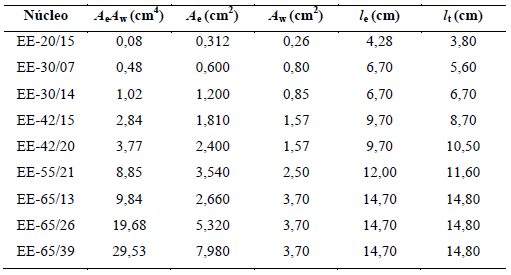

In [76]:
A_eA_w = 1.02
A_e = 1.2
A_w = 0.85
le = 6.7 
lt = 6.7
print("A multiplicação entre a área efetiva e a área da janela do núcleo será", A_eA_w,"cm^4 - valor mais próximo do valor calculado")
print("A área efetiva será", A_e,"cm^2 - valor escolhido pela tabela")
print("A área da janela do núcleo será", A_w,"cm^2 - valor escolhido pela tabela")
print("O comprimento do caminho magnético será", le,"cm - valor escolhido pela tabela")
print("O comprimento médio de uma espira será", lt,"cm - valor escolhido pela tabela")

A multiplicação entre a área efetiva e a área da janela do núcleo será 1.02 cm^4 - valor mais próximo do valor calculado
A área efetiva será 1.2 cm^2 - valor escolhido pela tabela
A área da janela do núcleo será 0.85 cm^2 - valor escolhido pela tabela
O comprimento do caminho magnético será 6.7 cm - valor escolhido pela tabela
O comprimento médio de uma espira será 6.7 cm - valor escolhido pela tabela


#### Número de espiras

$$N = {LoI_{lmax}10^4 \over B_{max}A_{e}}$$

In [77]:
N = Lo*Il_max*10**4/(B_max*A_e)
N = int(N)
print("O número de espiras é", N)

O número de espiras é 329


#### Tamanho do entreferro

$$l_{g} = {N2u_{o}A_{e} \over Lo10^4}$$

In [78]:
uo = 4*3.1415926535897931*10**(-7)
lg = N**2*uo*A_e/(Lo*10**4)
print("O tamanho do entreferro é", lg*10**3, "mm")

O tamanho do entreferro é 0.7738006878827243 mm


#### Dimensionamento dos condutores

$$I_{tot} = 1.1Nl_{t}$$

$$S_{fio} = {I_{lrms} \over J}$$

In [79]:
ltot = 1.1*N*lt
print("O comprimento total do condutor é", ltot, "m")
Sfio = Il_rms/J
print("O valor mínimo da bitola é", Sfio*10**2, "mm^2")

O comprimento total do condutor é 2424.7300000000005 m
O valor mínimo da bitola é 0.11739000000000001 mm^2


###### Tabela: Condutores de cobre:
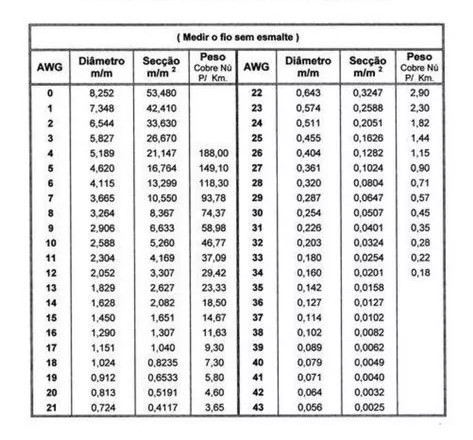

In [80]:
Sfio = 0.1282
print("O valor da bitola escolhido pela tabela acima foi", Sfio, "mm^2 - AWG=26")

O valor da bitola escolhido pela tabela acima foi 0.1282 mm^2 - AWG=26


$$A_{w min} = {n_{cond}S_{fio}10^{-2}N \over K_{w}}$$

In [81]:
ncond = 1
A_w_min = ncond*Sfio*10**(-2)*N/Kw
print("A valor mínimo da área da janela do núcleo será", A_w_min,"cm^2")

A valor mínimo da área da janela do núcleo será 0.7029633333333334 cm^2


<font color='green'>Como Aw_min é menor que Aw a execução do projeto é possível!!!</font>

### Projeto do Dissipador de Calor:

Para o caso sem dissipador, o calor circula da junção para o ambiente através do encapsulamento. Assim, o circuito térmico se resume apenas à resistência Rjc (junção-case) em série com Rca (case-ambiente), sendo estes parâmetros encontrados no datasheet do componenete. 

Para saber se o componente irá precisar de do dissipador de calor é estimado a temperatura de junção para a aplicação em específico. 

$$T_{j} = R_{ja}P_{T} + T_{a}$$

##### MOSFET (BSC100N10NSF):

In [82]:
P_T = 105.86*10**(-3)
R_ja = 62
Ta = 50
T_j_1 = R_ja*P_T + Ta
print("A temperatura de junção estimada é", T_j_1, "°C")

A temperatura de junção estimada é 56.56332 °C


<font color='green'>Como 56.56332°C é menor que 150°C (máxima temperatura de operação do transistor), o componente não precisa de um dissipador!!!</font>

##### DIODO (MBR20100CT):

In [83]:
P_T2 = 161.77*10**(-3)
R_ja2 = 60
Ta2 = 50
T_j_2 = R_ja2*P_T2 + Ta2
print("A temperatura de junção estimada é", T_j_2, "°C")

A temperatura de junção estimada é 59.7062 °C


<font color='green'>Como 59.7062°C é menor que 175°C (máxima temperatura de operação do diodo), o componente não precisa de um dissipador!!!</font>